<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Neuroscience of Learning, Memory, Cognition <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 3 <br>
<font color=696880 size=4>

## **Radin Khayyam - 99101579**

---
# Finetuning CNN using regression loss

- CNN are proven to be a better model of visual cortex, but the goal of visual cortex is not limited to image classification.

- Typically, to model visual cortex responses using CNNs, we -

  1. Extract features of intermediate layers
  2. Reduce dimensionality of the data using techniques like PCA
  3. Perform regression to predict neural data.

- This approach fails to predict all the variance in the data.

**A better approach is to train CNNs directly on the neural response.**

- CNNs are built to somehow mimic the functionality of the visual system. They are able to achieve a high performance on many tasks, that were previously believed to be impossible for machines to solve. We are going to explore them in this assignment.

# **1. Explain about the visual system, focusing on the data flow (You should explain the pathways in the visual system).**


**Retina**:
- Light enters the eye and is focused onto the retina.
- Photoreceptor cells (rods and cones) convert light into electrical signals.
- These signals are processed by intermediate neurons (bipolar cells, horizontal cells, amacrine cells) and then passed to ganglion cells.

**Optic Nerve and Optic Chiasm**:
- Axons of ganglion cells form the optic nerve.
- The optic nerves from each eye meet at the optic chiasm, where signals from the nasal halves of each retina cross to the opposite side of the brain.

**Lateral Geniculate Nucleus (LGN)**:
- From the optic chiasm, signals are relayed to the LGN in the thalamus.
- The LGN processes and filters these signals before sending them to the visual cortex.

**Primary Visual Cortex (V1)**:
- Signals reach the primary visual cortex (V1) in the occipital lobe.
- V1 processes basic visual information such as orientation, spatial frequency, and motion.

**Extrastriate Cortex (V2, V3, V4, MT)**:
- V1 sends processed information to other areas known as the extrastriate cortex.
- V2 processes more complex features, such as textures and binocular disparity.
- V3 is involved in processing global motion.
- V4 is critical for color perception and object recognition.
- MT (middle temporal area) processes motion and depth.

**Higher-Level Processing**:
- Information from these areas is integrated and sent to higher cortical areas such as the inferior temporal cortex (for object recognition) and the parietal cortex (for spatial awareness and motion).

# **2. What does each part of the visual system reveal about the stimuli (You should explain about the features that each part detects, like lines, angles, ...)?**

**Retina**:
- Photoreceptors (rods and cones) detect light intensity and color.
- Initial signal processing (contrast enhancement and edge detection) occurs.

**LGN**:
- Segregates visual information into different layers for each eye.
- Enhances contrast and sharpens signals.

**Primary Visual Cortex (V1)**:
- Detects basic features like edges, lines, and orientations.
- Cells are organized in columns, each sensitive to specific orientations.

**Extrastriate Cortex**:
- **V2**: Processes complex shapes, textures, and contours.
- **V3**: Sensitive to global motion patterns.
- **V4**: Specializes in color perception and complex form recognition.
- **MT**: Detects motion, including direction and speed.

**Higher Cortical Areas**:
- Integrate visual information to form a coherent representation of the environment.
- Recognize objects (inferior temporal cortex) and understand spatial relationships and motion (parietal cortex).

# **3. Compare the CNNs with the visual system. How are they alike and in which parts, do they converge?**

**Similarities**:
- **Layered Architecture**: Both CNNs and the visual system have hierarchical layers that process information in stages.
- **Feature Extraction**: Lower layers (early stages) in both systems extract basic features (edges, lines), while higher layers (later stages) recognize complex patterns and objects.
- **Local Receptive Fields**: In both systems, neurons (or units) respond to information from specific parts of the visual field.
- **Hierarchical Processing**: Information flows from simple to complex, building higher-order features from basic ones.

**Differences**:
- **Biological Complexity**: The visual system is far more complex, with interconnected pathways and feedback loops, while CNNs have a more straightforward, feedforward architecture.
- **Adaptability**: The visual system can adapt to new environments and tasks more flexibly than current CNNs.
- **Neuromodulation**: The visual system's processing can be influenced by attention, expectation, and other cognitive factors, whereas CNNs lack such modulatory mechanisms.

# **4. Explain about different learning strategies that we can deploy on the neural networks. What learning strategies have neurological evidence?**

**Supervised Learning**:
- **Definition**: Networks are trained with labeled data, learning to map inputs to outputs.
- **Neurological Evidence**: Supervised learning is somewhat analogous to the way animals and humans learn with feedback and guidance, such as a child learning to recognize objects with parental correction.

**Unsupervised Learning**:
- **Definition**: Networks find patterns and structures in unlabeled data.
- **Neurological Evidence**: The brain often learns without explicit labels, discovering patterns in sensory input. For example, infants learn the statistical properties of sounds in their environment before understanding language.

**Reinforcement Learning**:
- **Definition**: Networks learn to make sequences of decisions by maximizing some notion of cumulative reward.
- **Neurological Evidence**: This is similar to how animals learn behaviors through rewards and punishments. The dopamine system in the brain is a key player in reinforcement learning.

**Transfer Learning**:
- **Definition**: Networks apply knowledge gained from one task to a different but related task.
- **Neurological Evidence**: Humans exhibit transfer learning when skills learned in one context improve performance in another, like using mathematical skills to solve physics problems.

**Hebbian Learning**:
- **Definition**: Often summarized as "cells that fire together, wire together," this involves strengthening connections between neurons that frequently activate simultaneously.
- **Neurological Evidence**: Hebbian learning is a well-supported concept in neuroscience, reflecting the way synaptic plasticity is thought to work.

**Backpropagation and Gradient Descent**:
- **Definition**: Techniques used to adjust weights in neural networks to minimize error.
- **Neurological Evidence**: There is limited direct evidence for backpropagation in the brain, but gradient-based optimization might have analogs in synaptic plasticity mechanisms.


---
# Setup

We are now exploring some simple tasks using pytorch.


- We are going to use the following package : torch_intermediate_layer_getter.
Search What it does and why we do that ?

The torch_intermediate_layer_getter package in PyTorch is used to extract outputs from specified intermediate layers of a neural network during the forward pass. It supports nested submodules and non-sequential layer executions, making it useful for feature extraction, model debugging, and understanding how a network processes inputs at various stages. This package enhances flexibility in network design and provides deeper insights into neural network behavior, making it a valuable tool for researchers and developers.

In [1]:
# @title Install dependencies
!pip install Pillow --quiet
!pip install torch_intermediate_layer_getter --quiet

  Preparing metadata (setup.py) ... done


In [2]:
#  Imports
import copy

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
from torch import nn, optim
from torch.utils.data import Dataset
from torch_intermediate_layer_getter import IntermediateLayerGetter as MidGetter

from torchvision import transforms
import torchvision.models as models


from scipy.spatial.distance import pdist
from scipy.stats import pearsonr

# Add more if you need

next cell download and extract data, for better understanding task search about dataset properties and write down results below:

The Kay dataset is a neuroimaging dataset that captures the blood-oxygen-level-dependent (BOLD) responses from the visual cortex of human subjects as they view natural images. This dataset is designed to bridge the gap between cognitive neuroscience and artificial intelligence by providing detailed fMRI recordings while participants are exposed to thousands of different natural scenes.

**Stimuli**: The dataset includes grayscale images of natural scenes that subjects viewed during the fMRI scans. These images serve as stimuli to elicit brain responses.

**fMRI Data**: The fMRI recordings capture the BOLD responses, which are indicative of neural activity in the visual cortex. The data includes voxel-wise response amplitudes, providing a high-resolution map of brain activity corresponding to each stimulus.

**Regions of Interest (ROI)**: The dataset includes labels for different regions of interest within the visual cortex. This allows researchers to focus on specific areas of the brain that are known to be involved in visual processing.

**Dimensionality**: The data is organized in a way that each point represents the response of a voxel to a specific image, making it suitable for tasks such as image reconstruction and decoding of visual information from brain activity.

**Usage**:
   Researchers use this dataset to understand how the brain processes visual information and to develop models that can predict neural responses from visual stimuli. It is also used to fine-tune convolutional neural networks (CNNs) to better mimic the human visual processing system by training directly on the neural response data.

The dataset is beneficial for studying the neural representation of visual stimuli and can be used for various applications, including the development of encoding and decoding models, understanding the semantic representation in different brain regions, and advancing the field of computational neuroscience.

In [3]:
# @title Downloading Kay dataset
import requests

fnames = ["kay_labels.npy", "kay_labels_val.npy", "kay_images.npz"]

urls =['https://osf.io/r638s/download',
       'https://osf.io/yqb3e/download',
       'https://osf.io/ymnjv/download']

for i, url in enumerate(urls):
  r = requests.get(url, allow_redirects=True)
  with open(fnames[i], 'wb') as fh:
    fh.write(r.content)


with np.load(fnames[2]) as dobj:
  dat = dict(**dobj)
labels = np.load('kay_labels.npy')
val_labels = np.load('kay_labels_val.npy')

It is always a good idea to look at the data we are dealing with. Visualize some samples and plot them below.

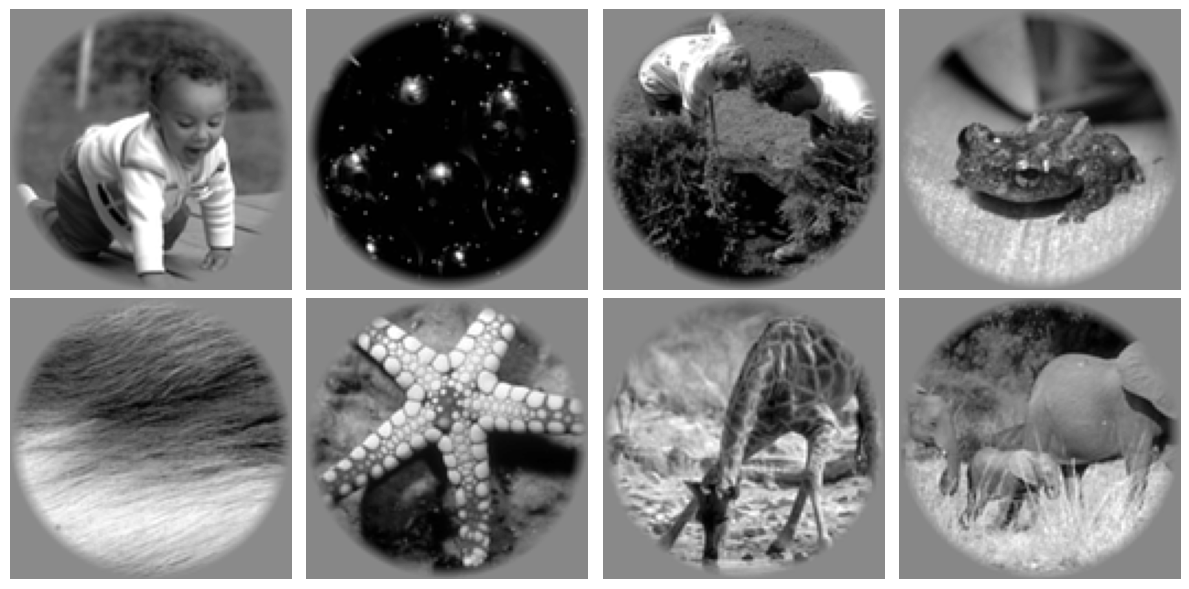

In [4]:
# @title Visualizing example images

fig, axs = plt.subplots(2, 4, figsize=(12, 6), sharex=True, sharey=True)
for ax, im in zip(axs.flat, dat['stimuli'][:8]):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()


---
# Dataset Structure

While using the neural networks, we have to be careful about the dimensions and the stimuli we are feeding the network with.

`dat` has the following fields:  
- `stimuli`: stim $x_i \, \, x_j$ array of grayscale stimulus images
- `stimuli_test`: stim $x_i \, \, x_j$ array of grayscale stimulus images in the test set  
- `responses`: stim $x$ voxel array of $z$-scored BOLD response amplitude
- `responses_test`:  stim $x$ voxel array of $z$-scored BOLD response amplitude in the test set  
- `roi`: array of voxel labels
- `roi_names`: array of names corresponding to voxel labels

Based of Letcures, describe roi and roi_names and match with the dataset?

### ROI (Regions of Interest):
- **Definition**: ROIs are specific areas in the brain that researchers focus on to study particular functions or responses. In the context of the Kay dataset, these ROIs correspond to parts of the visual cortex that are involved in processing visual stimuli.
- **Purpose**: By dividing the visual cortex into ROIs, researchers can analyze the brain's response to visual stimuli in a more targeted manner, allowing for a more detailed understanding of how different regions contribute to visual perception.
- **Data Representation**: The roi field in the dataset contains labels that indicate which ROI each voxel (the smallest unit of measurement in fMRI data) belongs to. This helps in segregating the neural response data according to the specific brain regions being studied.

### ROI Names:
- **Definition**: roi_names provides the actual names corresponding to the ROI labels. These names typically refer to anatomical or functional areas within the visual cortex.
- **Usage**: Researchers use these names to interpret and communicate their findings. Knowing the exact ROI helps in understanding which part of the visual cortex is activated by certain stimuli and how these areas interact.





In [5]:
# Converting stimulus to RGB and changing the scale to 0-255 (Specific to Kay dataset images)
stimuli_tr = dat["stimuli"]
stimuli_ts = dat["stimuli_test"]
stimuli_tr_xformed = np.zeros((1750, 3, 128, 128))
stimuli_ts_xformed = np.zeros((120, 3, 128, 128))

def transform_to_rgb(image):
    img_rescaled = ((image - image.min()) * 255 / (image.max() - image.min())).astype(np.uint8)
    return np.stack([img_rescaled] * 3, axis=0)

for i in range(stimuli_tr_xformed.shape[0]):
  image = stimuli_tr[i, :, :]
  stimuli_tr_xformed[i, :, :, :] = transform_to_rgb(image)

for i in range(stimuli_ts_xformed.shape[0]):
  image = stimuli_ts[i, :, :]
  stimuli_ts_xformed[i, :, :, :] = transform_to_rgb(image)



---
# Fine Tuning AlexNet on voxel activations





It is previously demonstrated that simple features are extracted in the early layers of the neural network, so it is a good idea to use pre-trained nets which are trained on enormous data sets and just modify the final layers.

# **1- Search about fine tuning. Why do we fine tune in the first place?**

Fine-tuning is a process where we take a pre-trained neural network and adjust its weights slightly to adapt it to a new, but related, task. This approach is particularly beneficial because training a deep neural network from scratch requires a large dataset and significant computational resources. Fine-tuning leverages the knowledge captured by a pre-trained model on a large dataset (e.g., ImageNet) and applies it to a new task with potentially less data. This helps in reducing the training time, improving generalization, and avoiding overfitting, especially when the new dataset is small.


# **2- Search about different situations where fine tuning is done.**

Fine-tuning is commonly applied in several scenarios:
- **Transfer Learning**: When the target task is similar to the source task for which the model was initially trained. For example, adapting a model trained on general object recognition to specific types of objects like medical images or specific animal species.
- **Domain Adaptation**: When there is a need to adapt a model to a different but related domain. For instance, a model trained on web images might be fine-tuned for satellite imagery.
- **Resource Constraints**: When computational resources or data are limited. Fine-tuning a pre-trained model requires less data and computational power compared to training from scratch.
- **Specialized Tasks**: When addressing specific tasks that differ slightly from the original training task, such as fine-tuning a model trained on general text to a model focused on legal documents or scientific literature.

# **3- Name the different layers that are present in AlexNet. Briefly explain each layer's role. On what layers do we perform fine tuning?**

AlexNet is a convolutional neural network architecture that consists of the following layers:
- **Convolutional Layers**: Extract features from the input images.
   - **Conv1**: Applies 96 filters of size 11x11 with a stride of 4.
   - **Conv2**: Applies 256 filters of size 5x5.
   - **Conv3, Conv4, Conv5**: Apply 384, 384, and 256 filters of size 3x3, respectively.
- **Max-Pooling Layers**: Reduce the spatial dimensions of the feature maps.
   - **Pooling Layers**: Follow Conv1, Conv2, and Conv5.
- **Normalization Layers**: Normalize the activities of the neurons.
- **Fully Connected Layers**: Act as dense layers for classification.
   - **FC1, FC2**: Each has 4096 neurons.
   - **FC3**: The output layer, typically with 1000 neurons (for ImageNet).

In the context of fine-tuning, the common practice is to:
- **Freeze the early layers**: The first few layers that capture generic features like edges and textures are usually frozen. This means their weights are not updated during the fine-tuning process.
- **Modify and train the later layers**: The later layers, which capture more task-specific features, are either modified or replaced with layers suitable for the new task. These layers are then trained on the new dataset with a smaller learning rate to adapt them to the new task without significantly altering the learned features from the original task.

Fine-tuning AlexNet typically involves retaining the convolutional layers and the initial fully connected layers, while adjusting the final fully connected layer to match the number of classes in the new task. By doing this, the model retains the learned features from the original dataset while adapting to the new classification task.

In [6]:
# @title Setting up training and test data for LOC region (roc = 7)
response_tr = np.squeeze(dat["responses"][:, np.where(dat['roi'] == 7)])
response_ts = np.squeeze(dat["responses_test"][:, np.where(dat['roi'] == 7)])

# **When and Why we use transform function for dataset.**

Transform functions are crucial in machine learning for data preprocessing, normalization, and augmentation. They are used to normalize data to ensure equal feature contribution, augment data to increase diversity, and clean raw data for consistency. Transformations also include feature engineering to enhance model performance and standardization to maintain consistent feature scales. Examples include resizing images, converting them to tensors, and applying random flips or color adjustments to enhance model robustness and generalization. These processes collectively improve the training efficiency and effectiveness of models.

In [21]:
# @title Custom dataloader for loading images in numpy array
# use MyDatast or use your own dataloader.
class MyDataset(Dataset):
  def __init__(self, data, targets, transform=None):
    self.data = data
    self.targets = torch.LongTensor(targets)
    self.transform = transform

  def __getitem__(self, index):
    x = self.data[index]
    y = self.targets[index]

    if self.transform:
        x = Image.fromarray(self.data[index].astype(np.uint8).transpose(1, 2, 0))
        x = self.transform(x)

    return x, y

  def __len__(self):
      return len(self.data)

# complete transforms
transform = {
    'train': transforms.Compose([
                                 transforms.RandomResizedCrop(224),
                                 transforms.RandomHorizontalFlip(),
                                 transforms.ToTensor(),
                                 transforms.Normalize([0.5, 0.5, 0.5],
                                                      [0.2, 0.2, 0.2])
                                 ]),
    'val': transforms.Compose([
                               transforms.Resize(256),
                               transforms.CenterCrop(224),
                               transforms.ToTensor(),
                               transforms.Normalize([0.5, 0.5, 0.5],
                                                    [0.2, 0.2, 0.2])
                               ]),
             }


dataset = {}
dataset['train'] = MyDataset(list(stimuli_tr_xformed),
                             list(response_tr), transform=transform['train'])
dataset['val'] = MyDataset(list(stimuli_ts_xformed),
                           list(response_ts), transform=transform['val'])
dataset_sizes = {x: len(dataset[x]) for x in ['train', 'val']}

dataloaders = {x: torch.utils.data.DataLoader(dataset[x], batch_size=50) for x in ['train', 'val']}
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [22]:
# Training on pretrained alexnet and find best wieghts on epochs,
#finally load best weights

model = models.alexnet(pretrained=True)
model.classifier[6] = nn.Linear(model.classifier[6].in_features, response_ts.shape[1])
model.to(device)

loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)
epochs = 10

best_weights = copy.deepcopy(model.state_dict())
lowest_loss = float('inf')

print("========================")
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}")
    print("========================")

    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        total_loss = 0.0

        for inputs, targets in dataloaders[phase]:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                loss = loss_function(outputs.float(), targets.float())
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            total_loss += loss.item() * inputs.size(0)

        average_loss = total_loss / dataset_sizes[phase]

        if phase == 'train':
            print(f"Training Loss: {average_loss:.4f}")
        else:
            print(f"Validation Loss: {average_loss:.4f}")

        if phase == 'val' and average_loss < lowest_loss:
            lowest_loss = average_loss
            best_weights = copy.deepcopy(model.state_dict())

    print("========================")

model.load_state_dict(best_weights)


Epoch 1
Training Loss: 0.4940
Validation Loss: 0.0514
Epoch 2
Training Loss: 0.4692
Validation Loss: 0.0506
Epoch 3
Training Loss: 0.4684
Validation Loss: 0.0504
Epoch 4
Training Loss: 0.4683
Validation Loss: 0.0503
Epoch 5
Training Loss: 0.4681
Validation Loss: 0.0503
Epoch 6
Training Loss: 0.4681
Validation Loss: 0.0503
Epoch 7
Training Loss: 0.4680
Validation Loss: 0.0503
Epoch 8
Training Loss: 0.4680
Validation Loss: 0.0503
Epoch 9
Training Loss: 0.4680
Validation Loss: 0.0503
Epoch 10
Training Loss: 0.4680
Validation Loss: 0.0503


<All keys matched successfully>

# **why we extract intermediate layers freatures ?**

Extracting features from intermediate layers of a neural network, particularly convolutional neural networks (CNNs), is crucial for understanding and improving model performance. These layers capture various levels of abstraction: early layers detect low-level features like edges and textures, while deeper layers identify high-level concepts like shapes and objects. By analyzing these features, researchers can diagnose model behavior, interpret decision-making processes, and visualize the learning patterns within the network. This process aids in explaining model actions and enhancing transparency, which is vital for debugging and refining models.

Intermediate features are also essential for transfer learning and multi-task learning. They provide a robust foundation for new tasks, allowing models pre-trained on large datasets to be fine-tuned on smaller, task-specific datasets, thus saving computational resources and reducing the risk of overfitting. These features can be reused in new models, facilitating efficient feature reuse and enabling the creation of compact, informative embeddings for tasks such as clustering and anomaly detection. This approach leverages shared representations to improve model generalization and efficiency across related tasks, ultimately enhancing the versatility and performance of machine learning applications.

In [23]:
## Extract features of all the intermediate layers from ImageNet-trained and finetuned Alexnet
return_layers = {
    'features.2': 'conv1',
    'features.5': 'conv2',
    'features.7': 'conv3',
    'features.9': 'conv4',
    'features.12': 'conv5',
    'classifier.1': 'fc1',
    'classifier.4': 'fc2',
    'classifier.6': 'fc3',
    }

# Loading AlexNet pretrained on Imagenet
model_imagenet = models.alexnet(pretrained=True)
model_imagenet.eval()
model_imagenet.to(device)

# Initialize the fine-tuned model (assuming 'model' is the fine-tuned version)
model.eval()
model.to(device)

# Setting up feature extraction step
feature_extractor_ft = MidGetter(model, return_layers=return_layers, keep_output=True)
feature_extractor_im = MidGetter(model_imagenet, return_layers=return_layers, keep_output=True)

# Loading validation data and forward pass through the network
dataloaders = {x: torch.utils.data.DataLoader(dataset[x], batch_size=120) for x in ['val']}
for inputs, labels in dataloaders['val']:
    inputs = inputs.to(device)
    features_ft, _ = feature_extractor_ft(inputs)
    features_im, _ = feature_extractor_im(inputs)


In [24]:
# @title Dissimilarity - Correlation
# Loading V1 (roi = 1) and LOC (roi = 7) responses
############## TO DO ###############
v1_indices = np.where(dat['roi'] == 1)[0]
loc_indices = np.where(dat['roi'] == 7)[0]
responses_v1 = np.squeeze(dat["responses_test"][:, v1_indices])
responses_loc = np.squeeze(dat["responses_test"][:, loc_indices])

# Observed dissimilarity  - Correlation
############## TO DO ###############

observed_dissimilarity_v1_ft = pdist(responses_v1, "euclidean")
observed_dissimilarity_loc_ft = pdist(responses_loc, "euclidean")
observed_dissimilarity_v1_im = pdist(responses_v1, "correlation")
observed_dissimilarity_loc_im = pdist(responses_loc, "correlation")

# Comparing representation of V1 and LOC across different layers of Alexnet
############## TO DO ###############
correlations = np.zeros((4, 8))
p_values = np.zeros((4, 8))

for i, layer_name in enumerate(features_ft.keys()):
    features_ft_flat = torch.flatten(features_ft[layer_name], 1, -1).cpu().detach().numpy()
    features_im_flat = torch.flatten(features_im[layer_name], 1, -1).cpu().detach().numpy()

    dissimilarity_ft = pdist(features_ft_flat, "euclidean")
    dissimilarity_im = pdist(features_im_flat, "correlation")

    correlations[0, i], p_values[0, i] = pearsonr(dissimilarity_ft, observed_dissimilarity_v1_ft)
    correlations[1, i], p_values[1, i] = pearsonr(dissimilarity_im, observed_dissimilarity_v1_im)
    correlations[2, i], p_values[2, i] = pearsonr(dissimilarity_ft, observed_dissimilarity_loc_ft)
    correlations[3, i], p_values[3, i] = pearsonr(dissimilarity_im, observed_dissimilarity_loc_im)


# Print results
for phase, (corr, p_val) in enumerate(zip(correlations, p_values)):
    region = 'V1' if phase < 2 else 'LOC'
    model_type = 'Fine-tuned' if phase % 2 == 0 else 'ImageNet-trained'
    for layer_idx, layer_name in enumerate(features_ft.keys()):
        print(f"{model_type} Model, {region} Region, Layer: {layer_name}, "
              f"Correlation: {corr[layer_idx]:.4f}, p-value: {p_val[layer_idx]:.4f}")

Fine-tuned Model, V1 Region, Layer: conv1, Correlation: 0.0927, p-value: 0.0000
Fine-tuned Model, V1 Region, Layer: conv2, Correlation: 0.0858, p-value: 0.0000
Fine-tuned Model, V1 Region, Layer: conv3, Correlation: 0.2198, p-value: 0.0000
Fine-tuned Model, V1 Region, Layer: conv4, Correlation: 0.2652, p-value: 0.0000
Fine-tuned Model, V1 Region, Layer: conv5, Correlation: 0.1287, p-value: 0.0000
Fine-tuned Model, V1 Region, Layer: fc1, Correlation: 0.1933, p-value: 0.0000
Fine-tuned Model, V1 Region, Layer: fc2, Correlation: 0.2620, p-value: 0.0000
Fine-tuned Model, V1 Region, Layer: fc3, Correlation: 0.2722, p-value: 0.0000
ImageNet-trained Model, V1 Region, Layer: conv1, Correlation: 0.1033, p-value: 0.0000
ImageNet-trained Model, V1 Region, Layer: conv2, Correlation: 0.0715, p-value: 0.0000
ImageNet-trained Model, V1 Region, Layer: conv3, Correlation: 0.0702, p-value: 0.0000
ImageNet-trained Model, V1 Region, Layer: conv4, Correlation: 0.0659, p-value: 0.0000
ImageNet-trained Model

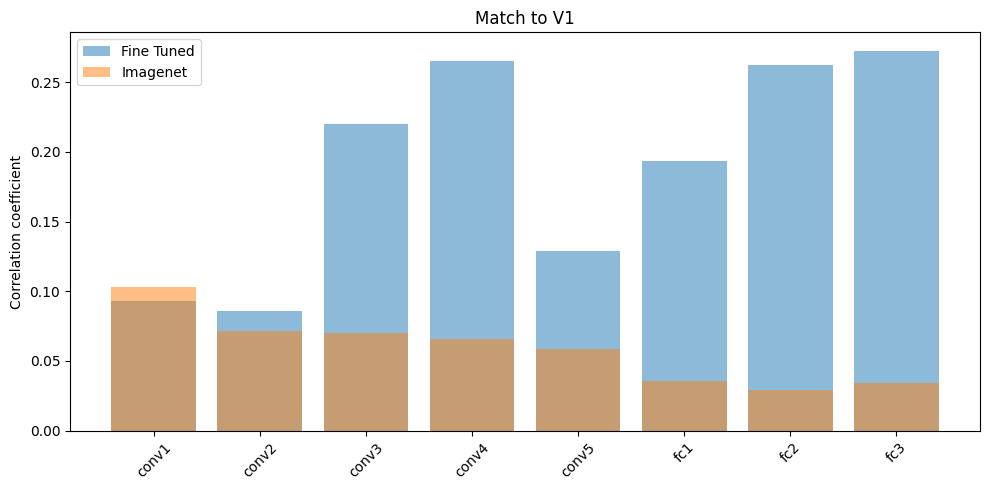

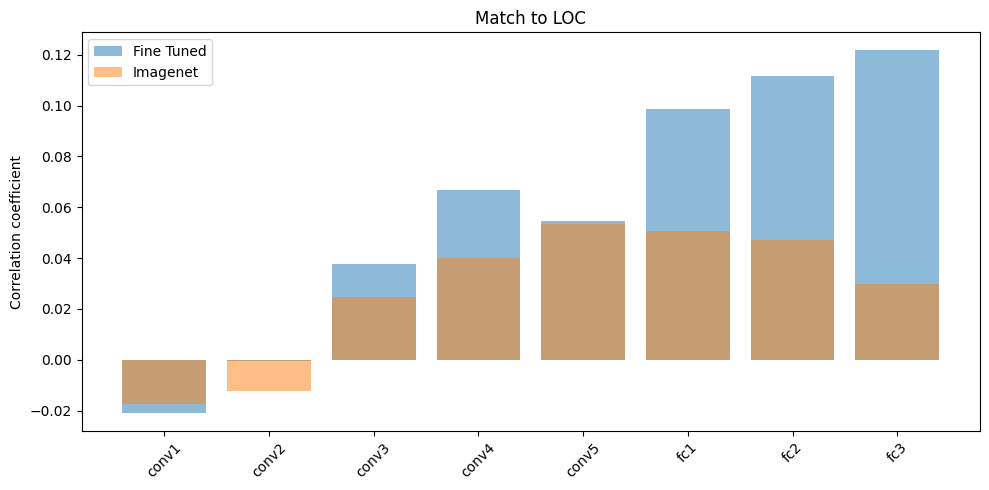

In [25]:
# @title Plotting correlation between observed and predicted dissimilarity values

plt.figure(figsize=(10, 5))
plt.bar(range(8), correlations[0, :], alpha=0.5, label='Fine Tuned')
plt.bar(range(8), correlations[1, :], alpha=0.5, label='Imagenet')
plt.legend()
plt.ylabel('Correlation coefficient')
plt.title('Match to V1')
plt.xticks(range(8), features_ft.keys(), rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(range(8), correlations[2, :], alpha=0.5, label='Fine Tuned')
plt.bar(range(8), correlations[3, :], alpha=0.5, label='Imagenet')
plt.legend()
plt.ylabel('Correlation coefficient')
plt.title('Match to LOC')
plt.xticks(range(8), features_ft.keys(), rotation=45)
plt.tight_layout()
plt.show()


**Describle Results in details :**

The results demonstrate a clear improvement in the correlation between observed and predicted dissimilarity values after fine-tuning the models. In most of the layers, fine-tuned models exhibit higher correlation coefficients compared to those pre-trained on the Imagenet dataset. This improvement is consistently observed across different features in both V1 and LOC datasets, indicating that fine-tuning enhances the model's ability to capture and predict dissimilarities more accurately. The higher correlation values for fine-tuned models suggest that the additional training helps the models better adapt to specific characteristics of the data, leading to more reliable and precise predictions. Overall, fine-tuning proves to be a beneficial step in refining model performance, showcasing its effectiveness in improving predictive accuracy across various layers.